In [4]:
import os
import cv2
from shapely.geometry import Polygon
import random

from src import utils
import src
from src.data.annotations.coco_annotations_manager import \
    CocoAnnotationsManager
from src.visualization.image_visualizer import show_image
from src.data.augmentation.template_manager import ImagesTemplatesManager


ANNOTATIONS_PATH = os.path.join(utils.DATA_PATH, 'annotations', 'annotations.json')
TEMPLATES_CONFIG_PATH = os.path.join(utils.DATA_PATH, 'annotations', 'templates.json')

CARD_IMAGES_PATH = os.path.join(utils.DATA_PATH, 'raw', 'templates')
IMAGE_NAME = '1.jpeg'

annotations_manager = CocoAnnotationsManager(ANNOTATIONS_PATH)
image_templates_manager = ImagesTemplatesManager(
    templates_config_path=TEMPLATES_CONFIG_PATH,
    annotation_manager=annotations_manager,
)

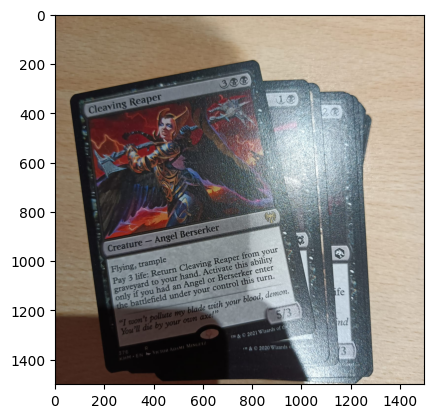

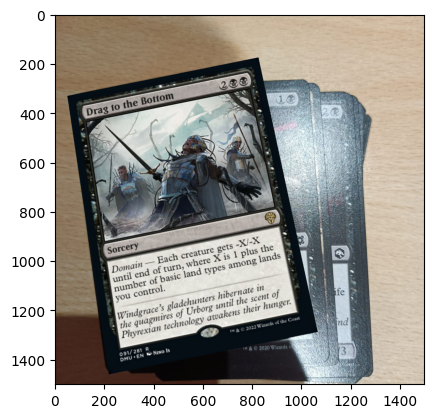

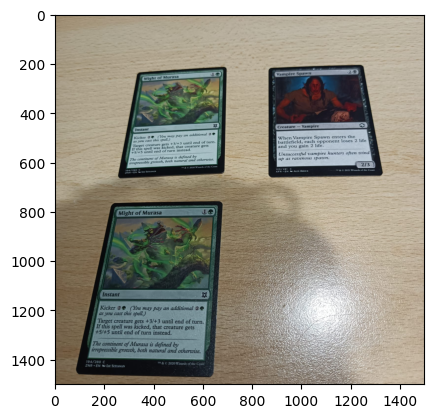

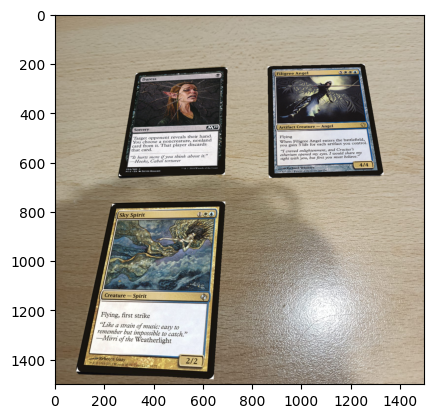

In [8]:
for template in image_templates_manager.get_templates():
    show_image(template.image)

    patches = [
        cv2.imread(os.path.join(utils.DATA_PATH, 'raw', 'card_images', f'{random.randint(0, 70000)}_normal.jpg')),
        cv2.imread(os.path.join(utils.DATA_PATH, 'raw', 'card_images', f'{random.randint(0, 70000)}_normal.jpg')),
        cv2.imread(os.path.join(utils.DATA_PATH, 'raw', 'card_images', f'{random.randint(0, 70000)}_normal.jpg'))
    ]

    patches = [
        cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)
        for patch 
        in patches
    ]

    generated, _ = template.generate_image(patches[:len(template.segmentation_polygons)])
    show_image(generated)
